In [1]:
pip install infomap

Note: you may need to restart the kernel to use updated packages.


Girvan-Newman Modularity: 3.432913904418051e-06


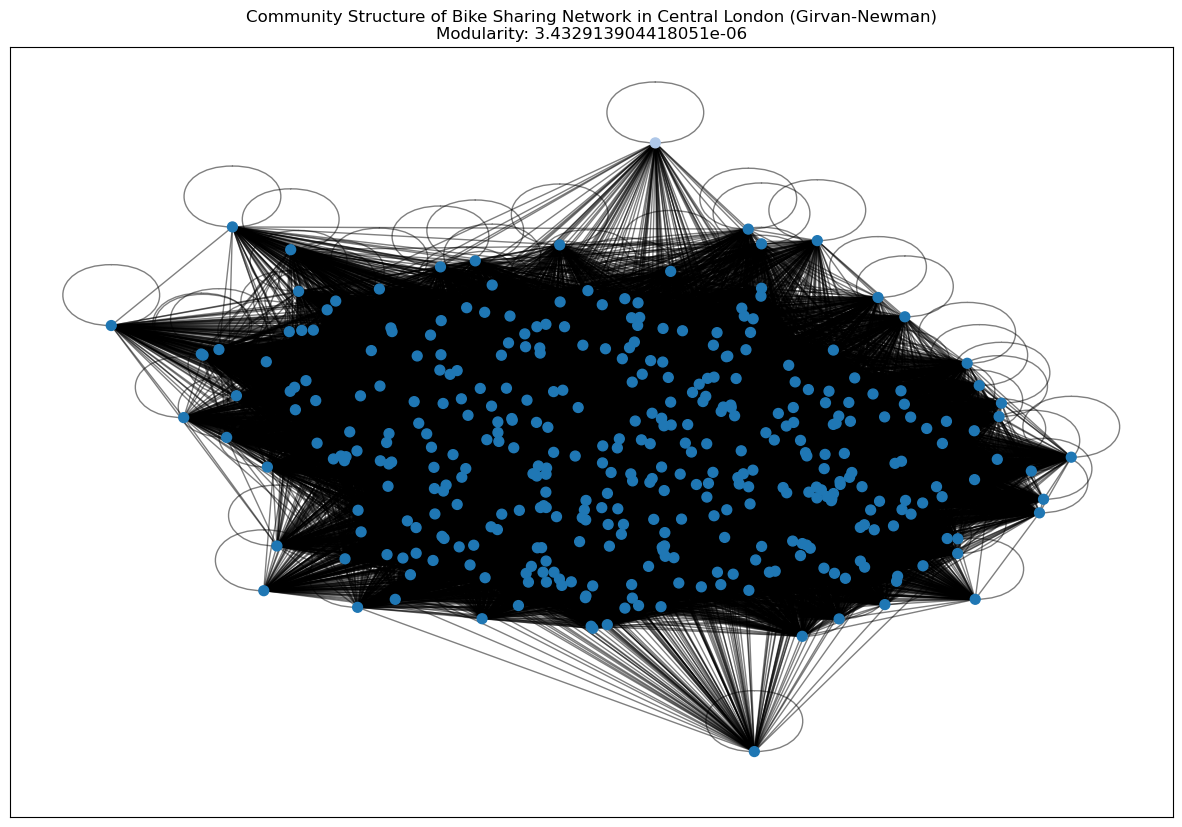

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from community import community_louvain

# Load the data
file_path = 'complete_data_final.csv'
trip_data = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for index, row in trip_data.iterrows():
    start_station = row['Start station number']
    end_station = row['End station number']
    if G.has_edge(start_station, end_station):
        G[start_station][end_station]['weight'] += 1
    else:
        G.add_edge(start_station, end_station, weight=1)

# # Optional: Preprocess the graph by removing edges below a certain weight threshold
# threshold = 5  # Adjust this threshold as needed
# edges_to_remove = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] < threshold]
# G.remove_edges_from(edges_to_remove)

# Compute communities using the Girvan-Newman algorithm
communities = next(girvan_newman(G))

# Create a partition dictionary
partition_gn = {}
for idx, community in enumerate(communities):
    for node in community:
        partition_gn[node] = idx

# Calculate modularity for Girvan-Newman partition
modularity_gn = community_louvain.modularity(partition_gn, G)
print(f"Girvan-Newman Modularity: {modularity_gn}")

# Create a color map for the partition
color_map = {}
colors = plt.cm.tab20.colors  # Get a set of colors
for idx, community in enumerate(set(partition_gn.values())):
    color_map[community] = colors[idx % len(colors)]

# Assign colors to nodes based on their community
node_colors_gn = [color_map[partition_gn[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw_networkx_nodes(G, pos, node_color=node_colors_gn, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title(f'Community Structure of Bike Sharing Network in Central London (Girvan-Newman)\nModularity: {modularity_gn}')
plt.show()
